# Árboles

## Curso "Introducción al Aprendizaje Automático"
## Facultad de Ingeniería
## UdelaR
fasdfasdfajsdfnsd

El árbol de decisión es uno de los modelos más intuitivos del aprendizaje supervisado. Aprende a tomar decisiones dividiendo el espacio de datos en regiones cada vez más homogéneas, a partir de preguntas simples sobre los atributos.

In [5]:
%pylab inline
import IPython
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


print('IPython version:', IPython.__version__)
print('numpy version:', np.__version__)
print('scikit-learn version:', sk.__version__)
print('pandas version:', pd.__version__)
print('matplotlib version:', matplotlib.__version__)

Populating the interactive namespace from numpy and matplotlib
IPython version: 7.34.0
numpy version: 2.0.2
scikit-learn version: 1.6.1
pandas version: 2.2.2
matplotlib version: 3.10.0


# Importar el dataset

Vamos a usar un dataset con personajes de los Simpsons, similar al que vimos en clase. Son datos sinteticos, de manera que puede contener errores.

La siguiente celda puede que no ejecute bien si corren localmente. Pueden descargar el archivo manualmente desde [este enlace](https://docs.google.com/spreadsheets/d/1nmBmgnPlkSyx8nsRKQAnBtkjIqIjEPTmxiX0dMvEADE/edit?usp=sharing)

In [6]:
dataset_url ="https://drive.google.com/file/d/1mvvP2S0ltwFHOwluGn-zha2Ga3Kn3bPv/view?usp=sharing"

!pip install -q gdown

import gdown


# Use gdown to download
gdown.download(dataset_url, output=None, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1mvvP2S0ltwFHOwluGn-zha2Ga3Kn3bPv
To: /content/toy_dataset.csv
100%|██████████| 9.95k/9.95k [00:00<00:00, 11.5MB/s]


'toy_dataset.csv'

La siguiente celda la ejecutamos para validar que el archivo este en el lugar adecuado:

In [7]:
import os

# assert <condicion que deberia cumplirse>, "mensaje de error si la condicion anterior falla"
assert os.path.exists("toy_dataset.csv"), "El archivo no existe"

Leemos el csv, para esto vamos a usar `Pandas`: es una gran biblioteca para analisis de datos, no vamos a profundizar demasiado en ella en el curso.

In [8]:
import pandas as pd

df = pd.read_csv("toy_dataset.csv")  # df es un DataFrame, muy similar a los de R

In [9]:
df.columns

Index(['Nombre', 'Sexo', 'Edad', 'Grupo Etario', 'Pelo', 'Color de piel',
       'Color de pelo', 'Tiene barba', 'Tiene bigote', 'Usa collar',
       'Usa lentes', 'Usa caravanas', 'Usa corbata', 'Usa moño', 'Usa chupete',
       'Es fumador', 'Ocupación principal', 'Primer episodio', 'Apariciones',
       'Apariciones en especiales', 'Personaje principal'],
      dtype='object')

In [10]:
n_instances, n_columns = df.shape
n_instances, n_columns

(88, 21)

In [11]:
pd.set_option('display.max_columns', None)
df.head()

Nombre       Sexo  Edad  Grupo Etario   Pelo Color de piel  \
0        Abraham Simpson  Masculino    83  Adulto mayor  Corto      Amarillo   
1          Agnes Skinner   Femenino    65  Adulto mayor  Corto        Blanco   
2  Alcalde José Diamante  Masculino    55        Adulto  Corto        Blanco   
3          Amber Simpson   Femenino    30        Adulto  Largo      Amarillo   
4            Alice Glick   Femenino    80  Adulto mayor  Corto      Amarillo   

  Color de pelo Tiene barba Tiene bigote Usa collar Usa lentes Usa caravanas  \
0      Amarillo          Sí           Sí         No         Sí            No   
1          Gris          Sí           No         No         No            No   
2          Gris          No           No         No         No            No   
3       Naranja          No           No         Sí         No            Sí   
4          Gris          No           No         No         No            No   

  Usa corbata Usa moño Usa chupete Es fumador Ocupación principal  \
0          No       No          No         No            Jubilado   
1          No       No          No         No         Ama de casa   
2          No       No          No         No             Alcalde   
3          No       No          No         Sí              Mesera   
4          No       No          No         No            Jubilada   

   Primer episodio  Apariciones  Apariciones en especiales Personaje principal  
0                1          543                          1                  Sí  
1                1          642                          4                  Sí  
2               17          121                          2                  Sí  
3                1           50                          1                  No  
4               34           12                          0                  No

In [ ]:
df.columns

Index(['Nombre', 'Sexo', 'Edad', 'Grupo Etario', 'Pelo', 'Color de piel',
       'Color de pelo', 'Tiene barba', 'Tiene bigote', 'Usa collar',
       'Usa lentes', 'Usa caravanas', 'Usa corbata', 'Usa moño', 'Usa chupete',
       'Es fumador', 'Ocupación principal', 'Primer episodio', 'Apariciones',
       'Apariciones en especiales', 'Personaje principal'],
      dtype='object')

In [12]:
# vemos el tipo de datos que hay en cada columna:
df.dtypes

Nombre                       object
Sexo                         object
Edad                          int64
Grupo Etario                 object
Pelo                         object
Color de piel                object
Color de pelo                object
Tiene barba                  object
Tiene bigote                 object
Usa collar                   object
Usa lentes                   object
Usa caravanas                object
Usa corbata                  object
Usa moño                     object
Usa chupete                  object
Es fumador                   object
Ocupación principal          object
Primer episodio               int64
Apariciones                   int64
Apariciones en especiales     int64
Personaje principal          object
dtype: object

In [13]:
def str_to_bool(x):
  return x.strip().lower() != "no"

boolean_features = ['Tiene barba', 'Tiene bigote', 'Usa collar', 'Usa lentes', 'Usa caravanas', 'Usa corbata', 'Usa moño','Usa chupete', 'Es fumador']
target = "Personaje principal"

for c in boolean_features + [target]:
  df[c] = df[c].apply(str_to_bool)

df.dtypes

Nombre                       object
Sexo                         object
Edad                          int64
Grupo Etario                 object
Pelo                         object
Color de piel                object
Color de pelo                object
Tiene barba                    bool
Tiene bigote                   bool
Usa collar                     bool
Usa lentes                     bool
Usa caravanas                  bool
Usa corbata                    bool
Usa moño                       bool
Usa chupete                    bool
Es fumador                     bool
Ocupación principal          object
Primer episodio               int64
Apariciones                   int64
Apariciones en especiales     int64
Personaje principal            bool
dtype: object

## Distribución de las clases en target

Vemos como se distribuye la columna "Personaje principal"

Clase: False, 47 ejemplos, 53.41%
Clase: True, 41 ejemplos, 46.59%


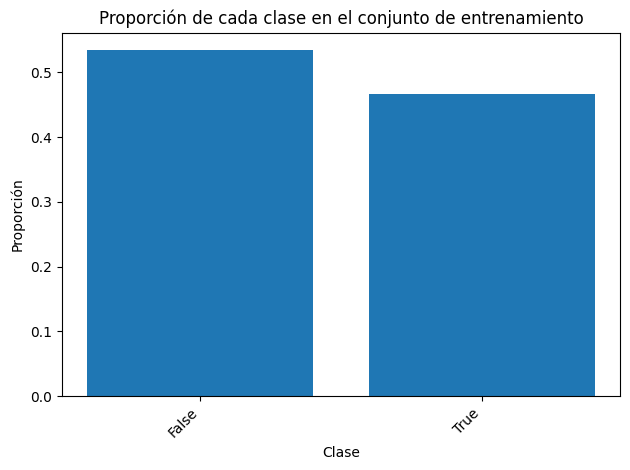

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Contar la frecuencia de cada clase en y_train
class_name, class_counts = np.unique(df["Personaje principal"], return_counts=True)

for name, count in zip(class_name, class_counts):
    print(f"Clase: {name}, {count} ejemplos, {count/class_counts.sum()*100:.2f}%")

plt.title('Proporción de cada clase en el conjunto de entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Proporción')
plt.bar(class_name, class_counts/class_counts.sum())
plt.xticks(class_name, [False, True], rotation=45, ha='right')
plt.tight_layout()
plt.show()

Partimos el dataset en train y test. El test no lo vamos a usar.

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop("Personaje principal", axis=1)
y = df["Personaje principal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (70, 20)
Shape of X_test: (18, 20)
Shape of y_train: (70,)
Shape of y_test: (18,)


### Ejercicio

La siguiente celda muestra la [documentación de la función train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Contestar **qué estamos haciendo** con los siguientes parámetros y **por qué** son importantes:

- `random_state=42`:

- `stratify=y`:

- `shuffle=True`:



In [16]:
train_test_split?

# Entrenar nuestro primer árbol

Comencemos por entrenar nuestro primer árbol, para el que vamos a usar unicamente las columnas booleanas

In [18]:

boolean_features

['Tiene barba',
 'Tiene bigote',
 'Usa collar',
 'Usa lentes',
 'Usa caravanas',
 'Usa corbata',
 'Usa moño',
 'Usa chupete',
 'Es fumador']

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier with default parameters
model = DecisionTreeClassifier(criterion="entropy", random_state=0)
model.fit(X_train[boolean_features], y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:

DecisionTreeClassifier?

In [23]:
np.unique(y_train, return_counts=True)

(array([False,  True]), array([37, 33]))

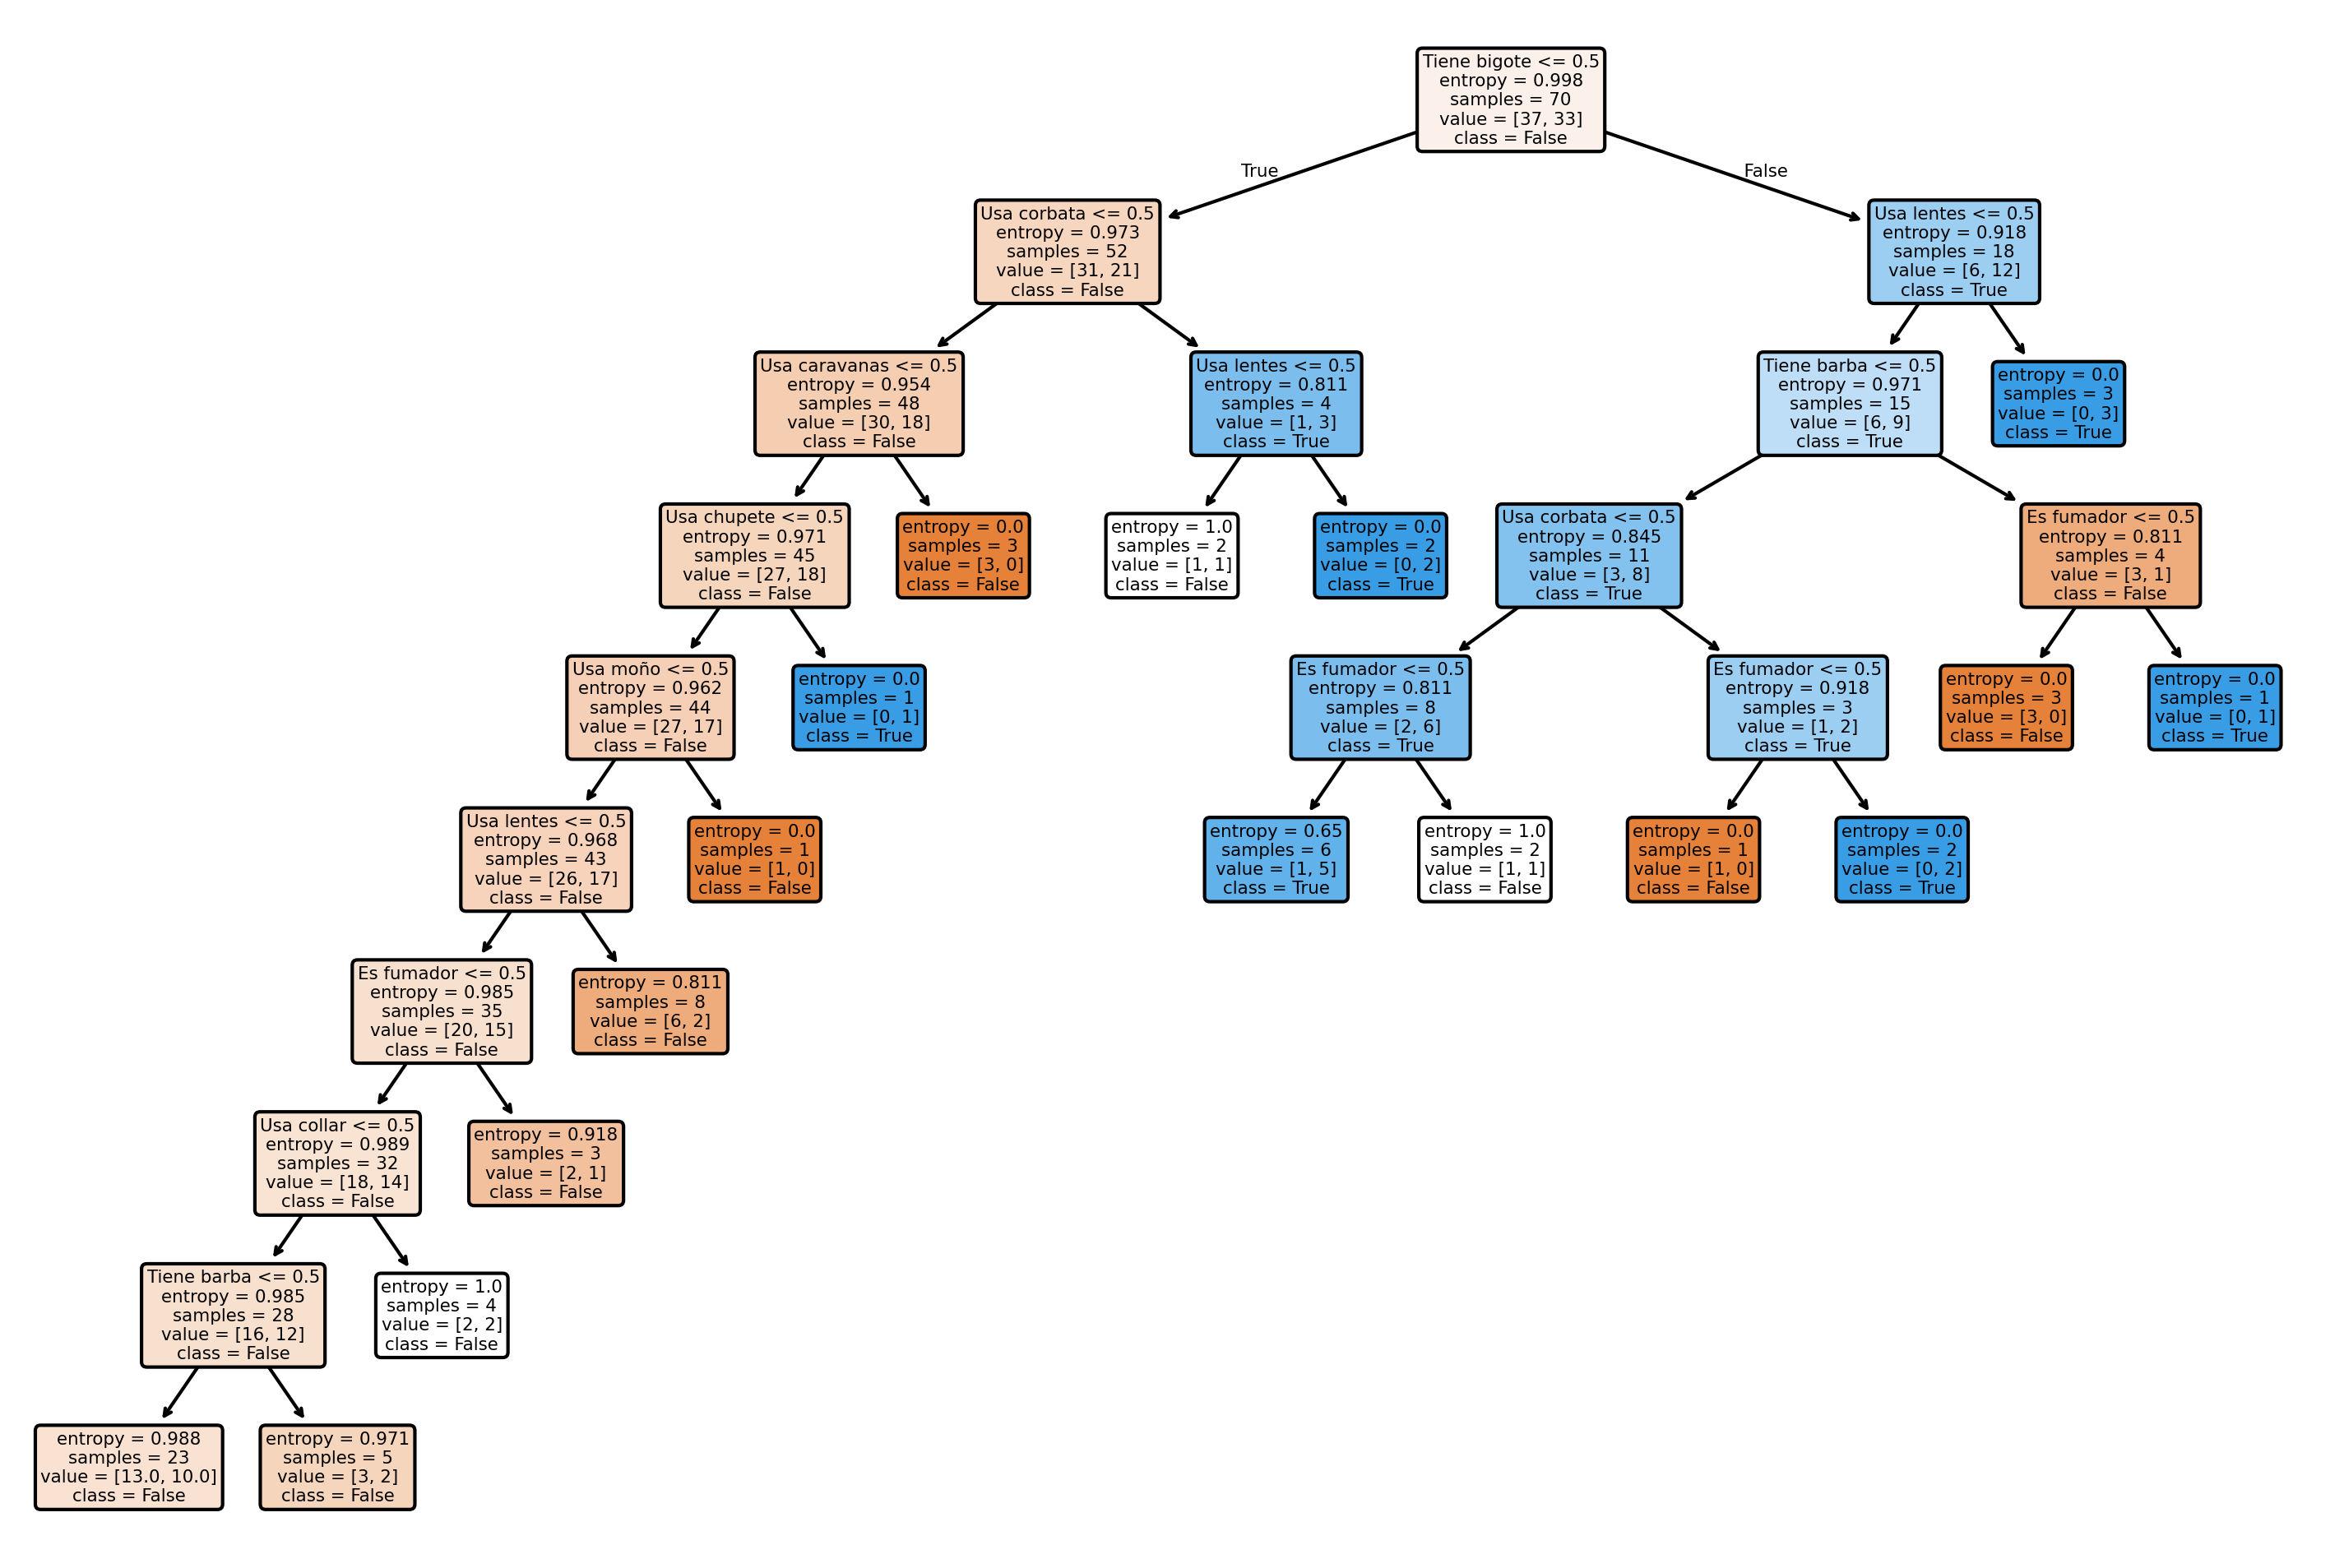

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8), dpi=300) # Increase figsize and dpi
plot_tree(model, feature_names=boolean_features, class_names=['False', 'True'], filled=True, rounded=True)
plt.show()

Que performance obtuvimos? Para contestar esta pregunta, vamos a utilizar validación cruzada con 7 folds, midiendo para cada una de ellas la f-score

In [24]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 7 folds
cv_scores = cross_val_score(model, X_train[boolean_features], y_train, cv=7, scoring="f1")

print("cv_scores.shape = ", cv_scores.shape)
print("F-scores for each fold:", cv_scores)
print("Mean F-score:", cv_scores.mean())
print("Standard deviation of F-scores:", cv_scores.std())


cv_scores.shape =  (7,)
F-scores for each fold: [0.33333333 0.4        0.57142857 0.44444444 0.25       0.44444444
 0.        ]
Mean F-score: 0.349092970521542
Standard deviation of F-scores: 0.16993365818047587


Veamos que sucede si repetimos lo mismo, pero esta vez, limitamos la capacidad del arbol:

In [ ]:

DecisionTreeClassifier?

In [25]:
shallow_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4,
                                      min_samples_split=5, random_state=0)

shallow_tree.fit(X_train[boolean_features], y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5,
                       random_state=0)

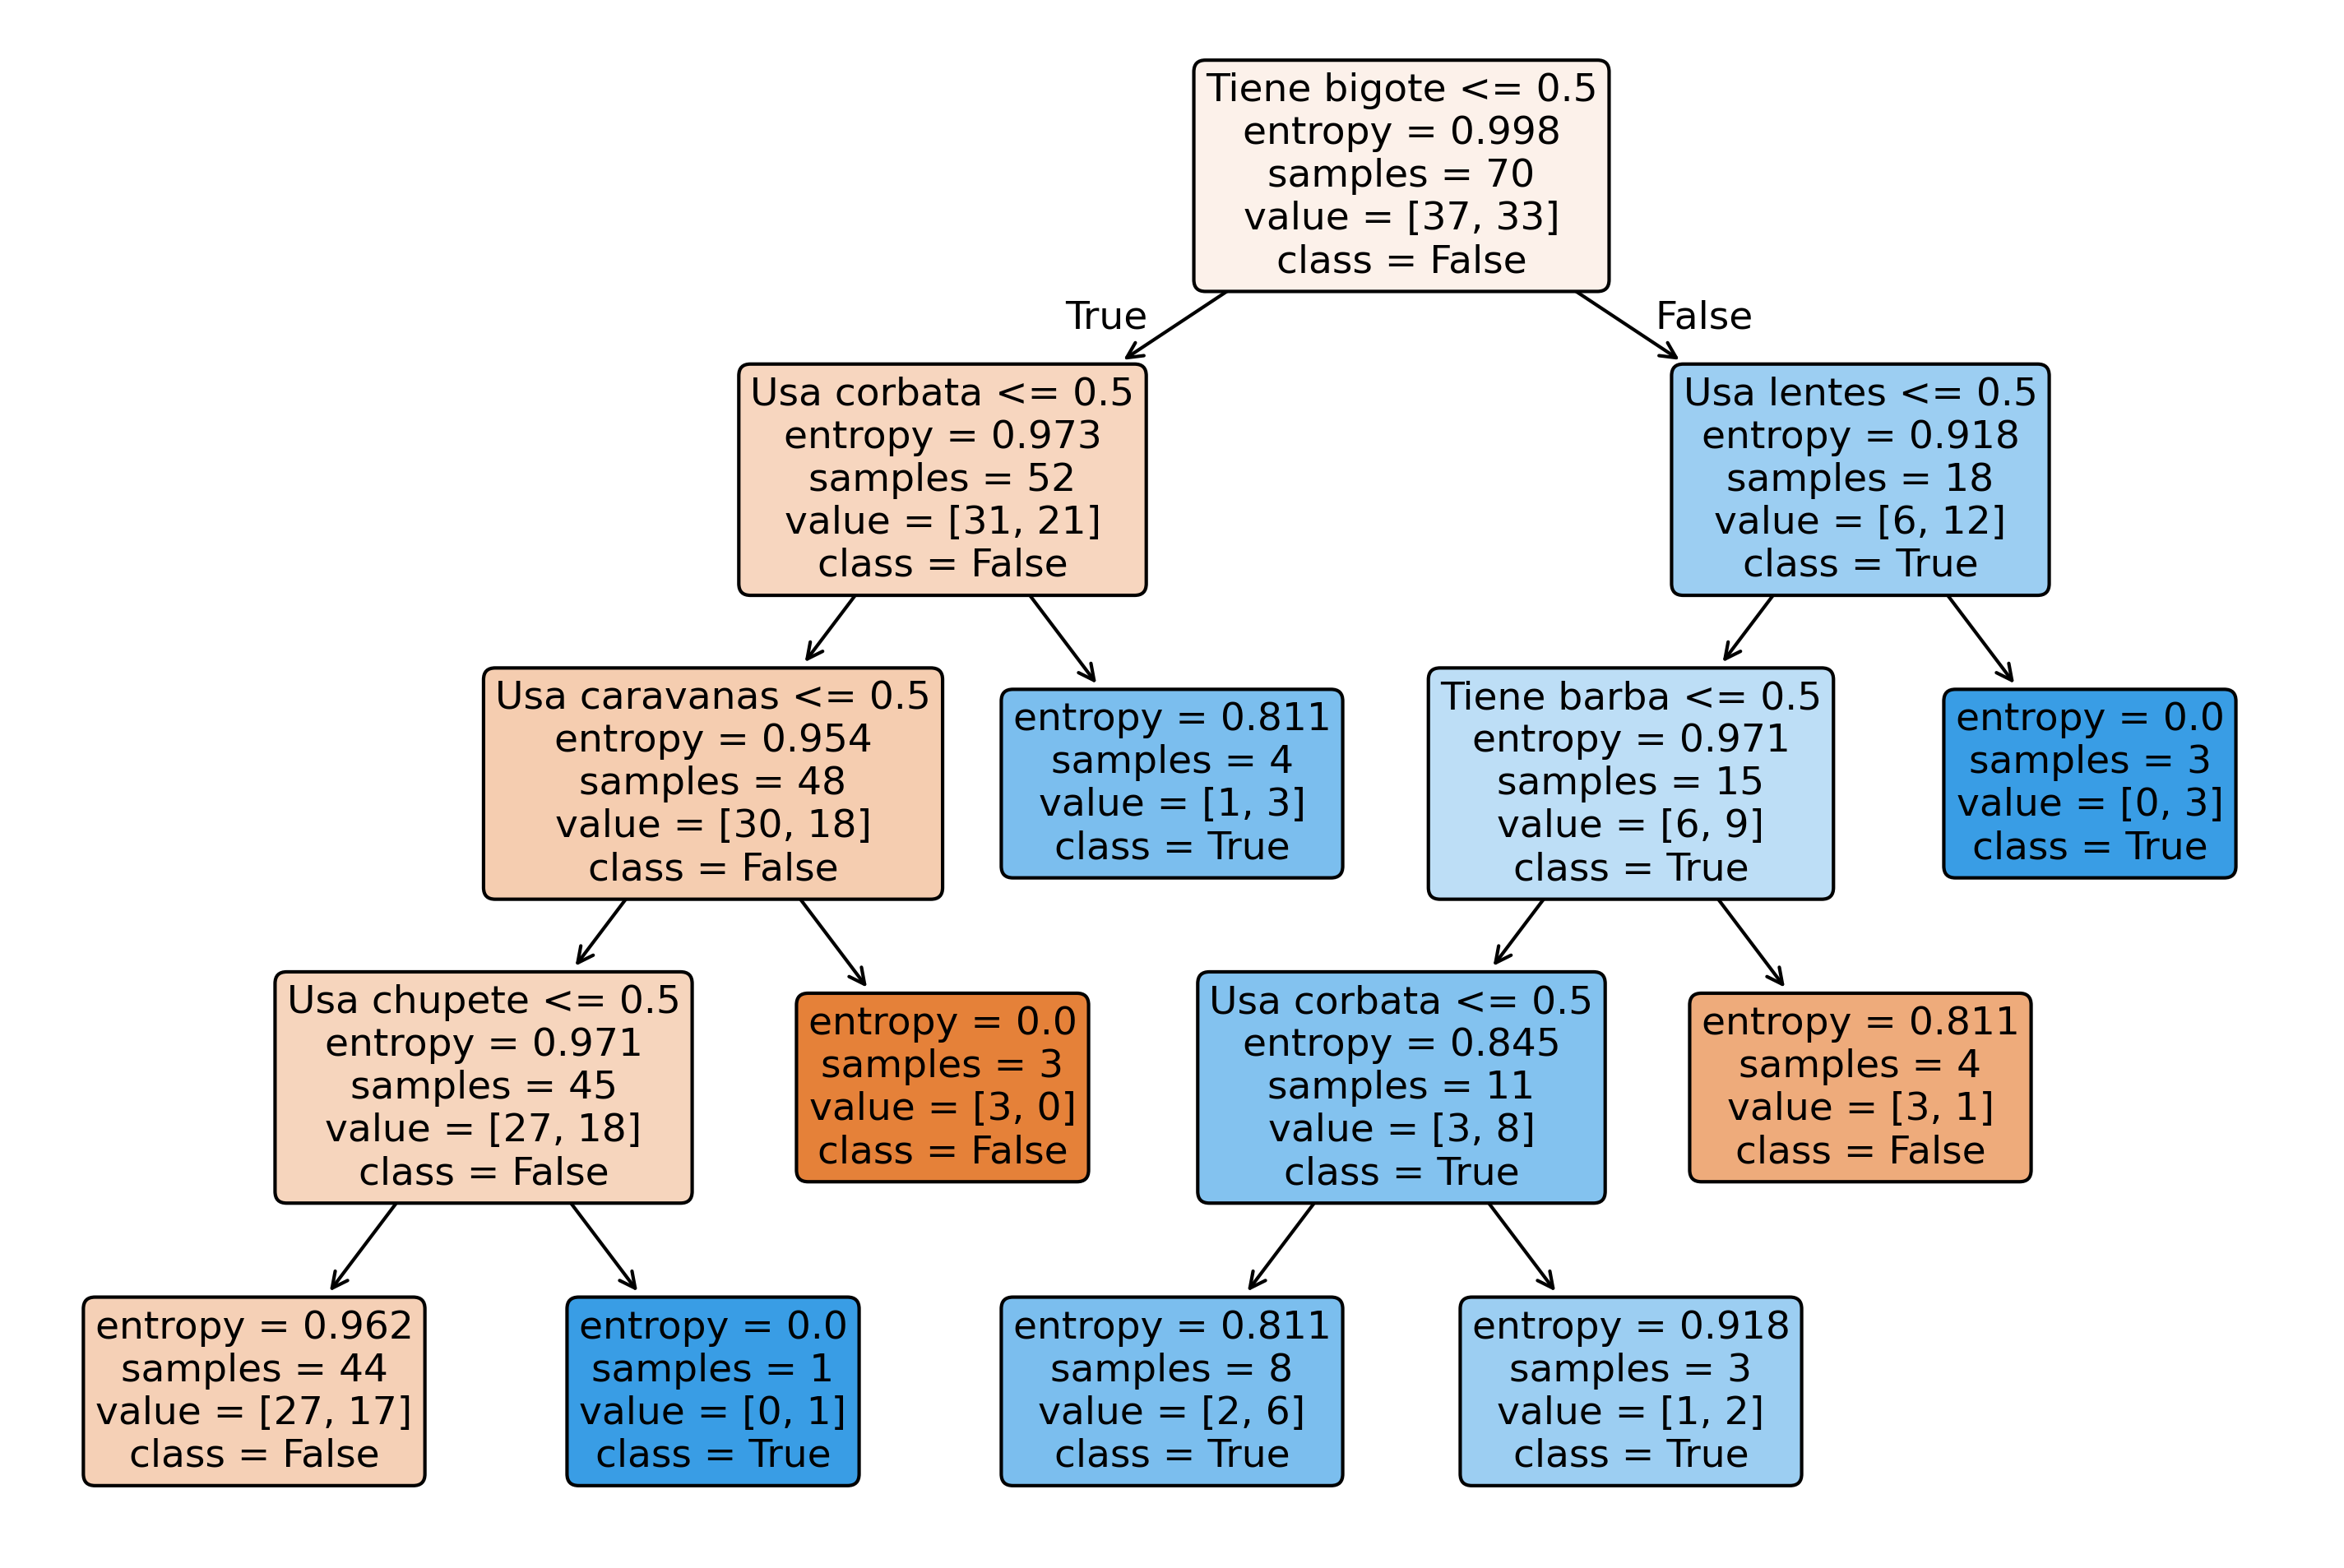

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8), dpi=300) # Increase figsize and dpi
plot_tree(shallow_tree, feature_names=boolean_features, class_names=['False', 'True'], filled=True, rounded=True)
plt.show()

Vemos la performance a la que llegamos:

In [27]:

from sklearn.model_selection import cross_val_score

# Perform cross-validation with 7 folds
cv_scores = cross_val_score(shallow_tree, X_train[boolean_features], y_train, cv=7, scoring="f1")

print("cv_scores.shape = ", cv_scores.shape)
print("F-scores for each fold:", cv_scores)
print("Mean F-score:", cv_scores.mean())
print("Standard deviation of F-scores:", cv_scores.std())

cv_scores.shape =  (7,)
F-scores for each fold: [0.5        0.66666667 0.57142857 0.28571429 0.25       0.25
 0.        ]
Mean F-score: 0.36054421768707484
Standard deviation of F-scores: 0.21302675197444543


# Busqueda de hiperparametros

Como sabemos que parametros deberiamos usar?

Este problema es la busqueda de hiperparametros: necesitamos saber como buscar los parametros que retornan mejores resultados. Vamos a explorar algunas formas de hacerlo, viendo pros y contras en cada caso.


Lo mas sencillo que podemos hacer es probar manualmente: consulten la documentacion de `DecisionTreeClassifier` para entender qué opciones tenemos y prueben modificar esos valores a ver como cambia la performance:

In [28]:
DecisionTreeClassifier?

_Este ejercicio puede ser infinito: asegurense de probar al menos 3 configuraciones y no dediquen más de 10 min._

In [32]:
manual_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4,
                                      min_samples_split=20, random_state=0)

cv_scores = cross_val_score(manual_tree, X_train[boolean_features], y_train, cv=7, scoring="f1")


print(f"F-score {cv_scores.mean():.03f} ± {cv_scores.std():.03f}")

F-score 0.471 ± 0.211


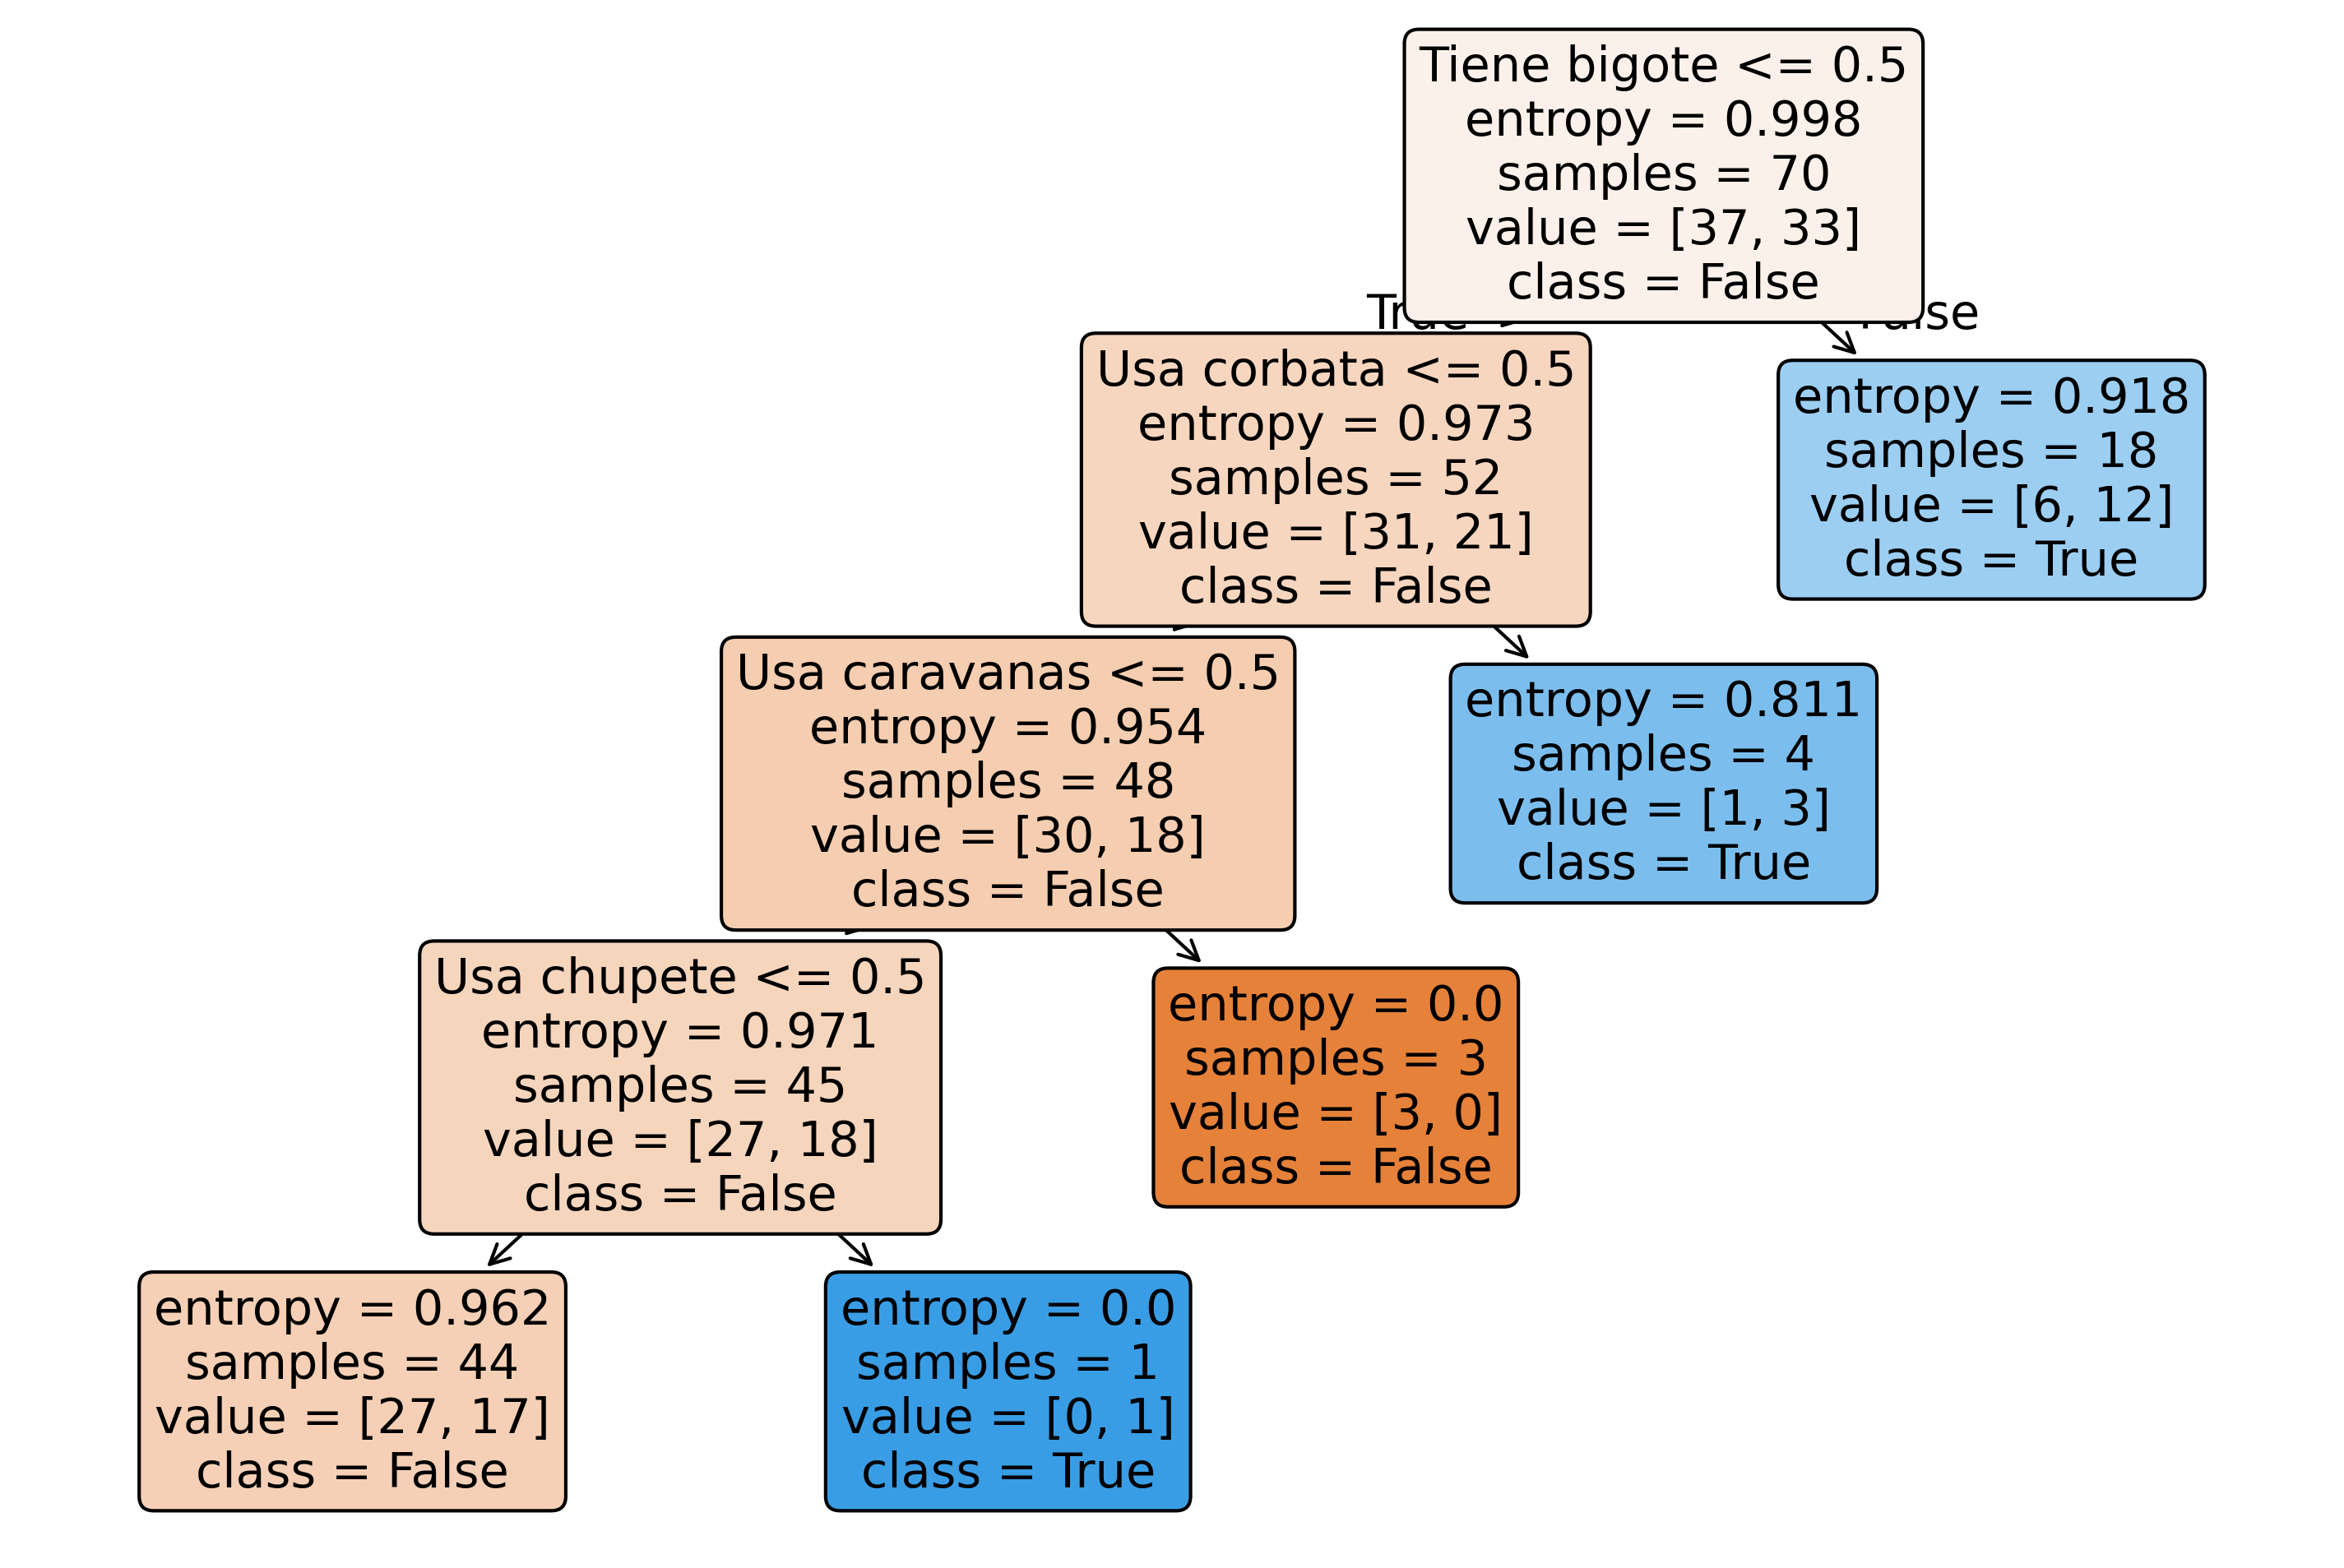

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

manual_tree.fit(X_train[boolean_features], y_train)
plt.figure(figsize=(12, 8), dpi=300) # Increase figsize and dpi
plot_tree(manual_tree, feature_names=boolean_features, class_names=['False', 'True'], filled=True, rounded=True)
plt.show()

## Manual search
Es lo que hicimos antes, probar cosas que nos parecen razonables a partir de nuestro conocimiento (del problema y del algoritmo que estoy usando).


### Ejercicio:

A partir de lo que probaron antes, completar brevemente lo siguiente:

**Ventajas de este enfoque:** _completar_


**Desventajas: lento, toma**: _completar_

In [ ]:

DecisionTreeClassifier?

## Grid Search

Podria intentar automatizar esto, definiendo valores que quiero probar, por ejempo:

```python
max_depth_values = [2, 4, 8]
min_samples_split_values = [2, 5, 10, 20]

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        dt = DecisionTreeClassifier(criterion="entropy",
                                    max_depth=max_depth,
                                    min_samples_split=min_samples_split)
        # evaluo dt con validacion cruzada, me guardo el resultado
        
# retorno la configuracion que dio mejor resultado
```
Se llama `grid` porque de alguna manera estoy definiendo una grilla de parametros a probar: todas las combinaciones posibles entre los que elegi.

Por fortuna, scikit learn trae ya esto implementado, de manera que es muy sencillo de usar. El ejemplo del pseudo codigo anterior, utilizando [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) es el siguiente:



In [36]:
DecisionTreeClassifier?

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [2,4, 8], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20] ,  # Function to measure the quality of a split
    'criterion': ["entropy", "log_loss", "gini"],
    'min_impurity_decrease': [0.0, .1, .05]
}
# param_grid es un diccionario que tiene como clave el nombre del parametro y como valor una lista con los valores a probar

n_configs = 7  # Usamos cv=7
for k,v in param_grid.items():
    n_configs *= len(v)
print("Number of trees to fit:", n_configs)
# parametros base a usar: si no sobreescribo en la rilla que defini, va a usar estos
tree = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=tree,
                           param_grid=param_grid,
                           cv=7,  # Use 7-fold cross-validation
                           scoring='f1', # Score using f1
                           n_jobs=-1) # Use all available cores

# Fit the grid search to the data
grid_search.fit(X_train[boolean_features], y_train)

# Print the best parameters and the best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation F1 score:: {:.4f} ± {:.4f}".format(grid_search.best_score_, grid_search.cv_results_['std_test_score'][grid_search.best_index_]))

Number of trees to fit: 756
Best parameters found: {'criterion': 'entropy', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_samples_split': 20}
Best cross-validation F1 score:: 0.4705 ± 0.2107


In [40]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.005528      0.001015         0.006989        0.001162   
1         0.004910      0.000064         0.007654        0.002021   
2         0.005767      0.002068         0.006472        0.000178   
3         0.005013      0.000305         0.007285        0.002176   
4         0.005522      0.001590         0.006494        0.000098   
..             ...           ...              ...             ...   
103       0.006310      0.000956         0.006956        0.000733   
104       0.004962      0.000213         0.007560        0.001255   
105       0.004867      0.000048         0.006375        0.000044   
106       0.006799      0.003146         0.007509        0.001458   
107       0.004985      0.001005         0.006436        0.001280   

    param_criterion  param_max_depth  param_min_impurity_decrease  \
0           entropy                2                         0.00   
1           entropy                2                         0.00   
2           entropy                2                         0.00   
3           entropy                2                         0.00   
4           entropy                2                         0.10   
..              ...              ...                          ...   
103            gini                8                         0.10   
104            gini                8                         0.05   
105            gini                8                         0.05   
106            gini                8                         0.05   
107            gini                8                         0.05   

     param_min_samples_split  \
0                          2   
1                          5   
2                         10   
3                         20   
4                          2   
..                       ...   
103                       20   
104                        2   
105                        5   
106                       10   
107                       20   

                                                params  split0_test_score  \
0    {'criterion': 'entropy', 'max_depth': 2, 'min_...                0.5   
1    {'criterion': 'entropy', 'max_depth': 2, 'min_...                0.5   
2    {'criterion': 'entropy', 'max_depth': 2, 'min_...                0.5   
3    {'criterion': 'entropy', 'max_depth': 2, 'min_...                0.5   
4    {'criterion': 'entropy', 'max_depth': 2, 'min_...                0.0   
..                                                 ...                ...   
103  {'criterion': 'gini', 'max_depth': 8, 'min_imp...                0.0   
104  {'criterion': 'gini', 'max_depth': 8, 'min_imp...                0.0   
105  {'criterion': 'gini', 'max_depth': 8, 'min_imp...                0.0   
106  {'criterion': 'gini', 'max_depth': 8, 'min_imp...                0.0   
107  {'criterion': 'gini', 'max_depth': 8, 'min_imp...                0.0   

     split1_test_score  split2_test_score  split3_test_score  \
0                  0.4           0.571429           0.666667   
1                  0.4           0.571429           0.666667   
2                  0.4           0.571429           0.666667   
3                  0.4           0.571429           0.666667   
4                  0.0           0.000000           0.000000   
..                 ...                ...                ...   
103                0.0           0.000000           0.000000   
104                0.0           0.000000           0.000000   
105                0.0           0.000000           0.000000   
106                0.0           0.000000           0.000000   
107                0.0           0.000000           0.000000   

     split4_test_score  split5_test_score  split6_test_score  mean_test_score  \
0             0.250000           0.444444                0.0         0.404649   
1             0.250000           0.444444                0.0         0.404649   
2             0.250000   

### Ejercicio:

1. Volver a la celda anterior y re-ejecutarla probando más combinaciones. Jueguen con otros parametros. Buscar una configuracion que reporte mejores numeros que la grid actual (0.4705).

2. A partir de lo que probaron antes, completar brevemente lo siguiente:

    - **Ventajas de este enfoque:** _completar_
    - **Desventajas de este enfoque**: _completar_

## Random Search

## 🔍 Random Search

Cuando probaron hiperparámetros a mano, lo hicieron más o menos al azar —y aun así lograron mejoras.

Random Search automatiza esa idea: en lugar de evaluar *todas* las combinaciones como en Grid Search, prueba un número limitado de configuraciones aleatorias.

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions to sample from
param_distributions = {
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],  # Integer values from 2 to 15
    'min_samples_split': randint(low=2, high=30), # Integer values from 2 to 29
}

# Define the number of iterations for the random search
n_iter_search = 12  # Number of parameter settings that are sampled.

print("Number of trees to fit:", n_iter_search * 7)

# Define the base model
tree = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=tree,
                                   param_distributions=param_distributions,
                                   n_iter=n_iter_search,
                                   cv=7,  # Use 7-fold cross-validation
                                   scoring='f1', # Score using f1
                                   random_state=42, # For reproducibility
                                   n_jobs=-1) # Use all available cores

# Fit the random search to the data
random_search.fit(X_train[boolean_features], y_train)

# Print the best parameters and the best score
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation F1 score: {:.4f} ± {:.4f}".format(random_search.best_score_, random_search.cv_results_['std_test_score'][random_search.best_index_]))

Number of trees to fit: 84
Best parameters found: {'max_depth': 4, 'min_samples_split': 24}
Best cross-validation F1 score: 0.4705 ± 0.2107


### Ejercicio
1. Vuelvan a la celda anterior, agreguen mas parametros a probar y la cantidad de configuraciones a probar, similar a como lo hicimos en grid search.

2. A partir de lo que probaron antes, completar brevemente lo siguiente:

    - Ventajas de este enfoque: completar
    - Desventajas de este enfoque: completar

## Más allá del azar: optimización de hiperparámetros

Hasta ahora vimos tres estrategias: probar a mano, hacer una búsqueda exhaustiva (Grid Search) o al azar (Random Search).

Pero existe una alternativa más sofisticada: **plantear la búsqueda de hiperparámetros como un problema de optimización**.  
En lugar de probar combinaciones “porque sí”, estos métodos intentan **usar la información obtenida en pruebas anteriores para decidir qué probar después**.

Existen frameworks como **Optuna**, **Hyperopt** o **BayesSearchCV**, que implementan estrategias como búsqueda bayesiana o métodos de Monte Carlo para encontrar buenas configuraciones de manera más eficiente.

Estan fuera del alcance de curso, pero vale la pena saber que existen —y que en muchos casos reales, son una mejor opción.


# Y las otras features?

Hasta aca trabajamos solo con las features booleanas. Llegamos a resultados magros, probablemente porque las features no son muy utiles para distinguir a los personajes principales de los secundarios.

Entrenemos a continuacion un arbol con todas las features a ver que resultado tenemos:

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier with default parameters
model = DecisionTreeClassifier(criterion="entropy", random_state=0)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Gary'

Por que fallo? El problema es que la implementaciond e scikit espera que todas las features sean numericas, pero tenemos muchos atributos categoricos, como el color de pelo o el nombre.

Como podemos pasar el color de pelo a numero?

Esta etapa en general se le llama pre-procesamiento o codificacion de atributos.

Veamos que alternativas tenemos

# Preprocesamiento

Para fijar ideas, pensemos en el atributo "color de pelo": el objetivo es obtener un mapeo que me lleve el valor del atributo, a una representacion numerica.

Decimos que este mapeo lo _aprendemos_ porque lo vamos a inferir de los datos. Como todo lo que aprendemos, debemos hacerlo **unicamente con el dataset de entrenamiento**.

In [45]:
X_train["Color de pelo"]

29       Negro
81        Gris
41        Gris
75       Rubio
72        Gris
        ...   
28       Negro
59     Castaño
22       Negro
65      Marrón
9     Amarillo
Name: Color de pelo, Length: 70, dtype: object

## One Hot Encoding

La idea es simple:  
por cada valor posible del atributo, agregamos una columna.  
En cada fila, todas las columnas tendrán 0, excepto la que corresponde al valor real, que tendrá un 1.

Por ejemplo, si la variable `color de pelo` puede valer `amarillo`, `azul` o `negro`, creamos tres columnas:


|color de pelo| color_amarillo | color_azul  | color_negro |
|-------------|----------------|-------------|-------------|
|'amarillo'   | 1              | 0           | 0           |
|'azul'       | 0              | 1           | 0           |
|'negro'      | 0              | 0           | 1           |


In [46]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display

# Select the categorical feature to encode
hair_color = X_train[['Color de pelo']]

print("Unique values for hair color:", np.unique(hair_color))

# Initialize the OneHotEncoder
# handle_unknown='ignore' allows the encoder to handle unseen categories in the test set
# sparse_output=False returns a dense numpy array instead of a sparse matrix
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

ohe.fit(hair_color)

# Fit the encoder on the training data and transform it
hair_color_encoded = ohe.transform(hair_color)

# Get the new column names after encoding
new_feature_names = ohe.get_feature_names_out(['Color de pelo'])

# Create a new DataFrame with the one-hot encoded columns
hair_color_df = pd.DataFrame(hair_color_encoded, columns=new_feature_names, index=X_train.index)

# Display the first few rows of the new DataFrame
display(hair_color_df.head())

# Display the shape of the new DataFrame
print("\nShape of one-hot encoded hair color:", hair_color_df.shape)

# Display the categories learned by the encoder
print("\nCategories learned by the encoder:", ohe.categories_)

Unique values for hair color: ['Amarillo' 'Azul' 'Blanco' 'Castaño' 'Gris' 'Marrón' 'Naranja' 'Negro'
 'Rubio' 'Verde']


Color de pelo_Amarillo  Color de pelo_Azul  Color de pelo_Blanco  \
29                     0.0                 0.0                   0.0   
81                     0.0                 0.0                   0.0   
41                     0.0                 0.0                   0.0   
75                     0.0                 0.0                   0.0   
72                     0.0                 0.0                   0.0   

    Color de pelo_Castaño  Color de pelo_Gris  Color de pelo_Marrón  \
29                    0.0                 0.0                   0.0   
81                    0.0                 1.0                   0.0   
41                    0.0                 1.0                   0.0   
75                    0.0                 0.0                   0.0   
72                    0.0                 1.0                   0.0   

    Color de pelo_Naranja  Color de pelo_Negro  Color de pelo_Rubio  \
29                    0.0                  1.0                  0.0   
81                    0.0                  0.0                  0.0   
41                    0.0                  0.0                  0.0   
75                    0.0                  0.0                  1.0   
72                    0.0                  0.0                  0.0   

    Color de pelo_Verde  
29                  0.0  
81                  0.0  
41                  0.0  
75                  0.0  
72                  0.0


Shape of one-hot encoded hair color: (70, 10)

Categories learned by the encoder: [array(['Amarillo', 'Azul', 'Blanco', 'Castaño', 'Gris', 'Marrón',
       'Naranja', 'Negro', 'Rubio', 'Verde'], dtype=object)]


El objeto `ohe` aprendio el mapeo correspondiente que nos lleva de esos colores a su representacion numerica. Podemos usarlo ahora para codificar el valor "Azul" por ejemplo:

In [47]:
ohe.transform([["Azul"]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [48]:
ohe.transform([["Amarillo"]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [49]:
ohe.transform([["Violeta"]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [50]:
np.unique(hair_color)

array(['Amarillo', 'Azul', 'Blanco', 'Castaño', 'Gris', 'Marrón',
       'Naranja', 'Negro', 'Rubio', 'Verde'], dtype=object)

### Ejercicio
- Generar la representación para los colores "Amarillo" y "Violeta". Como son sus representaciones con respecto a la del "Azul"? Explicar qué sucede y qué implica.
- Explicar ventajas y desventajas que noten en este mecanismo.
    - _Pista: qué pasa si tengo muchos colores?_

## Ordinal Encoder
El principal problema que tiene OneHotEncoding es que agrega muchas columnas. Si bien puedo hacer alguna cosa para limitarlo (ejemplo: solo decido codificar los N mas frecuentes), ese tipo de cosas en general acarrean expresividad

Una forma sencilla de levantar esa restriccion es asignar a cada color un numero:

"amarillo" -> 0
"azul" -> 1
"negro" -> 2
"verde" -> 3
"blanco" -> 4

Con esto puedo representar todos los colores con un unico numero. El problema que tiene esto es que estoy forzando una relacion que no existe: por qué el azul está más cerca del amarillo que del blanco?

Sin embargo, puede ser muy util cuando efectivamente tengo una relacion de orden en mis datos: por ejemplo, veamos que pasa con el Grupo Etario:

In [51]:
# Select the 'grupo etario' column
age_group = X_train[['Grupo Etario']]

# Check unique values and their order
print("Unique values for age group:", np.unique(age_group))

Unique values for age group: ['Adulto' 'Adulto mayor' 'Joven']


En estos casos existe cierto orten intrinseco: podemos ordenarlos perfectamente como `['Joven','Adulto', 'Adulto mayor']`, y de esta forma codificarlo con un solo numero, que además captura cierta relacion que se da en la realidad:

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder


# Define the desired order for the ordinal encoding
age_group_order = ['Joven','Adulto', 'Adulto mayor']

# Initialize the OrdinalEncoder with the specified order
oe = OrdinalEncoder(categories=[age_group_order], handle_unknown="use_encoded_value",unknown_value=-1)

# Fit the encoder on the training data and transform it
age_group_encoded = oe.fit_transform(age_group)

# Create a new DataFrame with the ordinal encoded column
age_group_df = pd.DataFrame(age_group_encoded, columns=['grupo etario_encoded'], index=X_train.index)

# Display the first few rows of the new DataFrame
display(age_group_df.head())

# Display the shape of the new DataFrame
print("\nShape of ordinal encoded age group:", age_group_df.shape)

# Display the categories learned by the encoder
print("\nCategories learned by the encoder:", oe.categories_)

# Example of transforming unseen data (e.g., a single value)
# Note: OrdinalEncoder handles unseen values differently depending on the handle_unknown parameter (default is 'error').
# If you might encounter unseen values in the test set, consider setting handle_unknown='use_encoded_value'
# and providing unknown_value (e.g., -1 or a value outside the defined range).
# For this example, let's transform a known value:
print("\nEncoding 'Adulto':", oe.transform([['Adulto']]))

grupo etario_encoded
29                   0.0
81                   2.0
41                   2.0
75                   0.0
72                   1.0


Shape of ordinal encoded age group: (70, 1)

Categories learned by the encoder: [array(['Joven', 'Adulto', 'Adulto mayor'], dtype=object)]

Encoding 'Adulto': [[1.]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


En este caso, el objeto `oe` es elq ue guarda ese mapeo. Probemos transformar las categorias conocidas a ver si representacion:

In [54]:
oe.transform([["Joven"], ["Adulto"],["Adulto mayor"],["bebe"],["adolescente"]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[ 0.],
       [ 1.],
       [ 2.],
       [-1.],
       [-1.]])

### Ejercicio
- Generar la representación para el grupo "Bebé" y para el grupo "Anciano". Como son sus representaciones con respecto a la de "Joven"? Explicar qué sucede y qué implica.

# Ingeniería de atributos: ¿Qué hacemos con el nombre?

Tenemos una columna `Nombre`, que hasta ahora no usamos.

En la clase anterior vimos que **se apellida “Simpson”** es una pista muy fuerte para saber si un personaje es principal. Entonces, podría ser útil usar el nombre... pero, ¿cómo?

In [55]:
X["Nombre"]

0           Abraham Simpson
1             Agnes Skinner
2     Alcalde José Diamante
3             Amber Simpson
4               Alice Glick
              ...          
83            Tony el Gordo
84             Troy McClure
85              Üter Zörker
86           Wendell Borton
87          Willie MacMoran
Name: Nombre, Length: 88, dtype: object

## Ejercicio
Vimos como funciona `OneHotEncoder` y `OrdinalEncoder`: ¿cuál usarías para codificar el atributo `nombre`? Justifique brevemente.

Bien, el nombre en si tiene una cardinalidad muy alta, de hecho son todos nombres unicos: es un identificador. Codificarlo no me va a servir de mucho asi como viene. Ahora, este identificador, esconde cierta informacion, que, por nuestro conocimiento del dominio, sabemos que es util: el apellido Simpson.

La **ingeniería de atributos** consiste en transformar o crear nuevas variables a partir de las originales, para representar mejor la información relevante para el modelo.

En este caso:

- La variable nombre no es útil directamente.

- Sabemos algo del dominio: el apellido “Simpson” es relevante.

- Entonces, extraer el apellido es una forma de hacer ingeniería de atributos.

Esto también muestra que:

No todo lo que está en los datos sirve tal como viene.

Nuestro conocimiento del problema importa: no todo lo puede hacer automáticamente el modelo.



In [56]:
def se_apellida_simpson(nombre):
  return "simpson" in nombre.lower()

# aca vamos a aplicar una funcion directo sobre los datos, en vez de  hacerlo con scikit
# la funcion `apply` al llamarla sobre una columna, toma cada fila de la columna
# y le aplica la funcion que pasamos por parametro, en este caso `se_apellida_simpson`
# El resultado lo guardamos en una nueva columna
X_train["apellido_simpson"] = X_train["Nombre"].apply(se_apellida_simpson)
# Importante: recuerden aplicar las modificaciones al test!
X_test["apellido_simpson"] = X_test["Nombre"].apply(se_apellida_simpson)

In [57]:
X_train["apellido_simpson"]

29    False
81    False
41    False
75    False
72    False
      ...  
28    False
59    False
22    False
65    False
9      True
Name: apellido_simpson, Length: 70, dtype: bool

Otro punto en el que podemos hacer esta ingenieria de atributos, es combinandolos. Pensemos por ejemplo en las feaatures numericas que tiene el dataset:

In [ ]:
X_train[['Primer episodio', 'Apariciones','Apariciones en especiales']]

Algo que puedo hacer es combinar esta informacion para tener cosas mas claras. Por ejemplo, si divido la cantidad de apariciones en especiales que tuvo sobre el total de apariciones, voy a tener una idea de cuantos especiales participo respecto a la cantidad de episodios totales en los que participo.

Eso puedo hacerlo de esta forma:

In [58]:
def ratio_especiales(row):
    """
    row: diccionario que representa la fila del dataframe,
    donde la clave es el nombre de la columna y el valor es el valor de esa
    columna para esa fila.

    El valor que vamos a retornar va a quedar asignado a la columna
    "ratio_especiales" que estamos creando
    """
    if row["Apariciones"] == 0:
        return 0
    return row["Apariciones en especiales"] / row["Apariciones"]

X_train["ratio_especiales"] = X_train.apply(ratio_especiales, axis=1)
X_test["ratio_especiales"] = X_test.apply(ratio_especiales, axis=1)

In [59]:
X_train["ratio_especiales"]

29    0.000000
81    0.020000
41    0.020000
75    0.020000
72    0.013333
        ...   
28    0.153846
59    0.040000
22    0.142857
65    0.013333
9     0.006369
Name: ratio_especiales, Length: 70, dtype: float64

### Ejercicio
Implementar las funciones `new_feature_uno` y `new_feature_dos` para generar dos features nuevas a partir de todas las que tienen hasta el momento. Deben ser features numericas (retornar `float`, `int` o `bool`).

_Importante: no renombren las funciones!_


In [61]:
X_train.dtypes

Nombre                        object
Sexo                          object
Edad                           int64
Grupo Etario                  object
Pelo                          object
Color de piel                 object
Color de pelo                 object
Tiene barba                     bool
Tiene bigote                    bool
Usa collar                      bool
Usa lentes                      bool
Usa caravanas                   bool
Usa corbata                     bool
Usa moño                        bool
Usa chupete                     bool
Es fumador                      bool
Ocupación principal           object
Primer episodio                int64
Apariciones                    int64
Apariciones en especiales      int64
apellido_simpson                bool
ratio_especiales             float64
dtype: object

In [68]:
def new_feature_uno(row):
    """
    row: diccionario que representa la fila del dataframe,
    donde la clave es el nombre de la columna y el valor es el valor de esa
    columna para esa fila.

    El valor que vamos a retornar va a quedar asignado a la columna
    "ratio_especiales" que estamos creando
    """
    # completen aca
    return row["Tiene bigote"] or row["Tiene barba"]

X_train["new_feature_uno"] = X_train.apply(new_feature_uno, axis=1)
X_test["new_feature_uno"] = X_test.apply(new_feature_uno, axis=1)

In [69]:
def new_feature_dos(row):
    """
    row: diccionario que representa la fila del dataframe,
    donde la clave es el nombre de la columna y el valor es el valor de esa
    columna para esa fila.

    El valor que vamos a retornar va a quedar asignado a la columna
    "ratio_especiales" que estamos creando
    """
    # completen aca
    return row["Apariciones"] > 30

X_train["new_feature_dos"] = X_train.apply(new_feature_dos, axis=1)
X_test["new_feature_dos"] = X_test.apply(new_feature_dos, axis=1)

In [65]:

max_apariciones = X_train["Apariciones"].max()
max_apariciones

790

In [70]:
max_apariciones = X_train["Apariciones"].max() #

def new_feature_tres(row):
    """
    row: diccionario que representa la fila del dataframe,
    donde la clave es el nombre de la columna y el valor es el valor de esa
    columna para esa fila.

    El valor que vamos a retornar va a quedar asignado a la columna
    "ratio_especiales" que estamos creando
    """
    # completen aca
    return row["Apariciones"] / max_apariciones

X_train["new_feature_tres"] = X_train.apply(new_feature_tres, axis=1)
X_test["new_feature_tres"] = X_test.apply(new_feature_tres, axis=1)

In [71]:
last_episode = X_train["Primer episodio"].max() #

def new_feature_cuatro(row):
    """
    row: diccionario que representa la fila del dataframe,
    donde la clave es el nombre de la columna y el valor es el valor de esa
    columna para esa fila.

    El valor que vamos a retornar va a quedar asignado a la columna
    "ratio_especiales" que estamos creando
    """
    # completen aca
    return last_episode / row["Primer episodio"]

X_train["new_feature_cuatro"] = X_train.apply(new_feature_cuatro, axis=1)
X_test["new_feature_cuatro"] = X_test.apply(new_feature_cuatro, axis=1)

In [77]:
ultimo_episodio = (X_train["Primer episodio"]+X_train["Apariciones"]).max() #

def new_feature_cinco(row):
    """
    row: diccionario que representa la fila del dataframe,
    donde la clave es el nombre de la columna y el valor es el valor de esa
    columna para esa fila.

    El valor que vamos a retornar va a quedar asignado a la columna
    "ratio_especiales" que estamos creando
    """
    # completen aca
    return row["Apariciones"]/(ultimo_episodio + 1 - row["Primer episodio"])

X_train["new_feature_cinco"] = X_train.apply(new_feature_cinco, axis=1)
X_test["new_feature_cinco"] = X_test.apply(new_feature_cinco, axis=1)

ahora es momento de usar todas estas features para generar un arbol:

In [79]:
X_train.dtypes

Nombre                        object
Sexo                          object
Edad                           int64
Grupo Etario                  object
Pelo                          object
Color de piel                 object
Color de pelo                 object
Tiene barba                     bool
Tiene bigote                    bool
Usa collar                      bool
Usa lentes                      bool
Usa caravanas                   bool
Usa corbata                     bool
Usa moño                        bool
Usa chupete                     bool
Es fumador                      bool
Ocupación principal           object
Primer episodio                int64
Apariciones                    int64
Apariciones en especiales      int64
apellido_simpson                bool
ratio_especiales             float64
new_feature_uno                 bool
new_feature_dos                 bool
new_feature_tres             float64
new_feature_cuatro           float64
new_feature_cinco            float64
dtype: object

In [80]:
import pandas as pd
# Identificar columnas categóricas y numéricas
categorical_features = ['Sexo', 'Grupo Etario', 'Pelo', 'Color de piel',
                          'Color de pelo']
numerical_features = ['Edad', 'Tiene barba', 'Tiene bigote', 'Usa collar',
                        'Usa lentes', 'Usa caravanas', 'Usa corbata', 'Usa moño',
                        'Usa chupete','Es fumador', 'Primer episodio', 'Apariciones',
                        'Apariciones en especiales', 'apellido_simpson',
                        'new_feature_uno', 'new_feature_dos', 'new_feature_tres', 'new_feature_cuatro', 'new_feature_cinco']


# Aplicar One-Hot Encoding a las características categóricas
# Creamos una instancia del OneHotEncoder
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Entrenamos el encoder con los datos de entrenamiento
ohe_encoder.fit(X_train[categorical_features])

# Transformamos los datos de entrenamiento y prueba
X_train_categorical_encoded = ohe_encoder.transform(X_train[categorical_features])
X_test_categorical_encoded = ohe_encoder.transform(X_test[categorical_features])

# Obtenemos los nombres de las nuevas columnas creadas por el OneHotEncoder
new_categorical_feature_names = ohe_encoder.get_feature_names_out(categorical_features)

# Creamos DataFrames con las características categóricas codificadas
X_train_categorical_df = pd.DataFrame(X_train_categorical_encoded,
                                      columns=new_categorical_feature_names,
                                      index=X_train.index)
X_test_categorical_df = pd.DataFrame(X_test_categorical_encoded,
                                     columns=new_categorical_feature_names,
                                     index=X_test.index)

# Concatenamos las características numéricas originales con las categóricas codificadas
X_train_processed = pd.concat([X_train[numerical_features], X_train_categorical_df], axis=1)
X_test_processed = pd.concat([X_test[numerical_features], X_test_categorical_df], axis=1)


# Definir el modelo de Árbol de Decisión con parámetros por defecto
# Usamos criterion='entropy' como en los ejemplos anteriores, pero los demás son los por defecto
model_full_features = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Entrenar el modelo con todas las características preprocesadas
model_full_features.fit(X_train_processed, y_train)

# Evaluar el modelo usando validación cruzada
cv_scores_full_features = cross_val_score(model_full_features, X_train_processed, y_train, cv=7, scoring="f1")

print("cv_scores_full_features.shape = ", cv_scores_full_features.shape)
print("F-scores for each fold (full features):", cv_scores_full_features)
print("Mean F-score (full features):", cv_scores_full_features.mean())
print("Standard deviation of F-scores (full features):", cv_scores_full_features.std())

cv_scores_full_features.shape =  (7,)
F-scores for each fold (full features): [0.44444444 0.66666667 0.88888889 0.72727273 0.76923077 0.8
 0.75      ]
Mean F-score (full features): 0.7209290709290709
Standard deviation of F-scores (full features): 0.1293220147116695


### Ejercicio:
Encontrar los mejores parametros para entrenar un arbol con `X_train_processed, y_train` siguiendo alguno de los metodos vistos antes. Reportar la mejor medida f-1 en cada caso, utilizando validacion cruzada

In [84]:
model_full_features = DecisionTreeClassifier(criterion="entropy", random_state=0)

best_params = {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
model_full_features = DecisionTreeClassifier(random_state=0, **best_params)

# Entrenar el modelo con todas las características preprocesadas
model_full_features.fit(X_train_processed, y_train)

# Evaluar el modelo usando validación cruzada
cv_scores_full_features = cross_val_score(model_full_features, X_train_processed, y_train, cv=7, scoring="f1")

print("cv_scores_full_features.shape = ", cv_scores_full_features.shape)
print("F-scores for each fold (full features):", cv_scores_full_features)
print("Mean F-score (full features):", cv_scores_full_features.mean())
print("Standard deviation of F-scores (full features):", cv_scores_full_features.std())
# entrenarlo, buscar mejores parametros, reportar metrica obtenida

cv_scores_full_features.shape =  (7,)
F-scores for each fold (full features): [0.88888889 0.75       0.72727273 0.90909091 0.76923077 0.83333333
 0.88888889]
Mean F-score (full features): 0.8238150738150737
Standard deviation of F-scores (full features): 0.0692617233686316


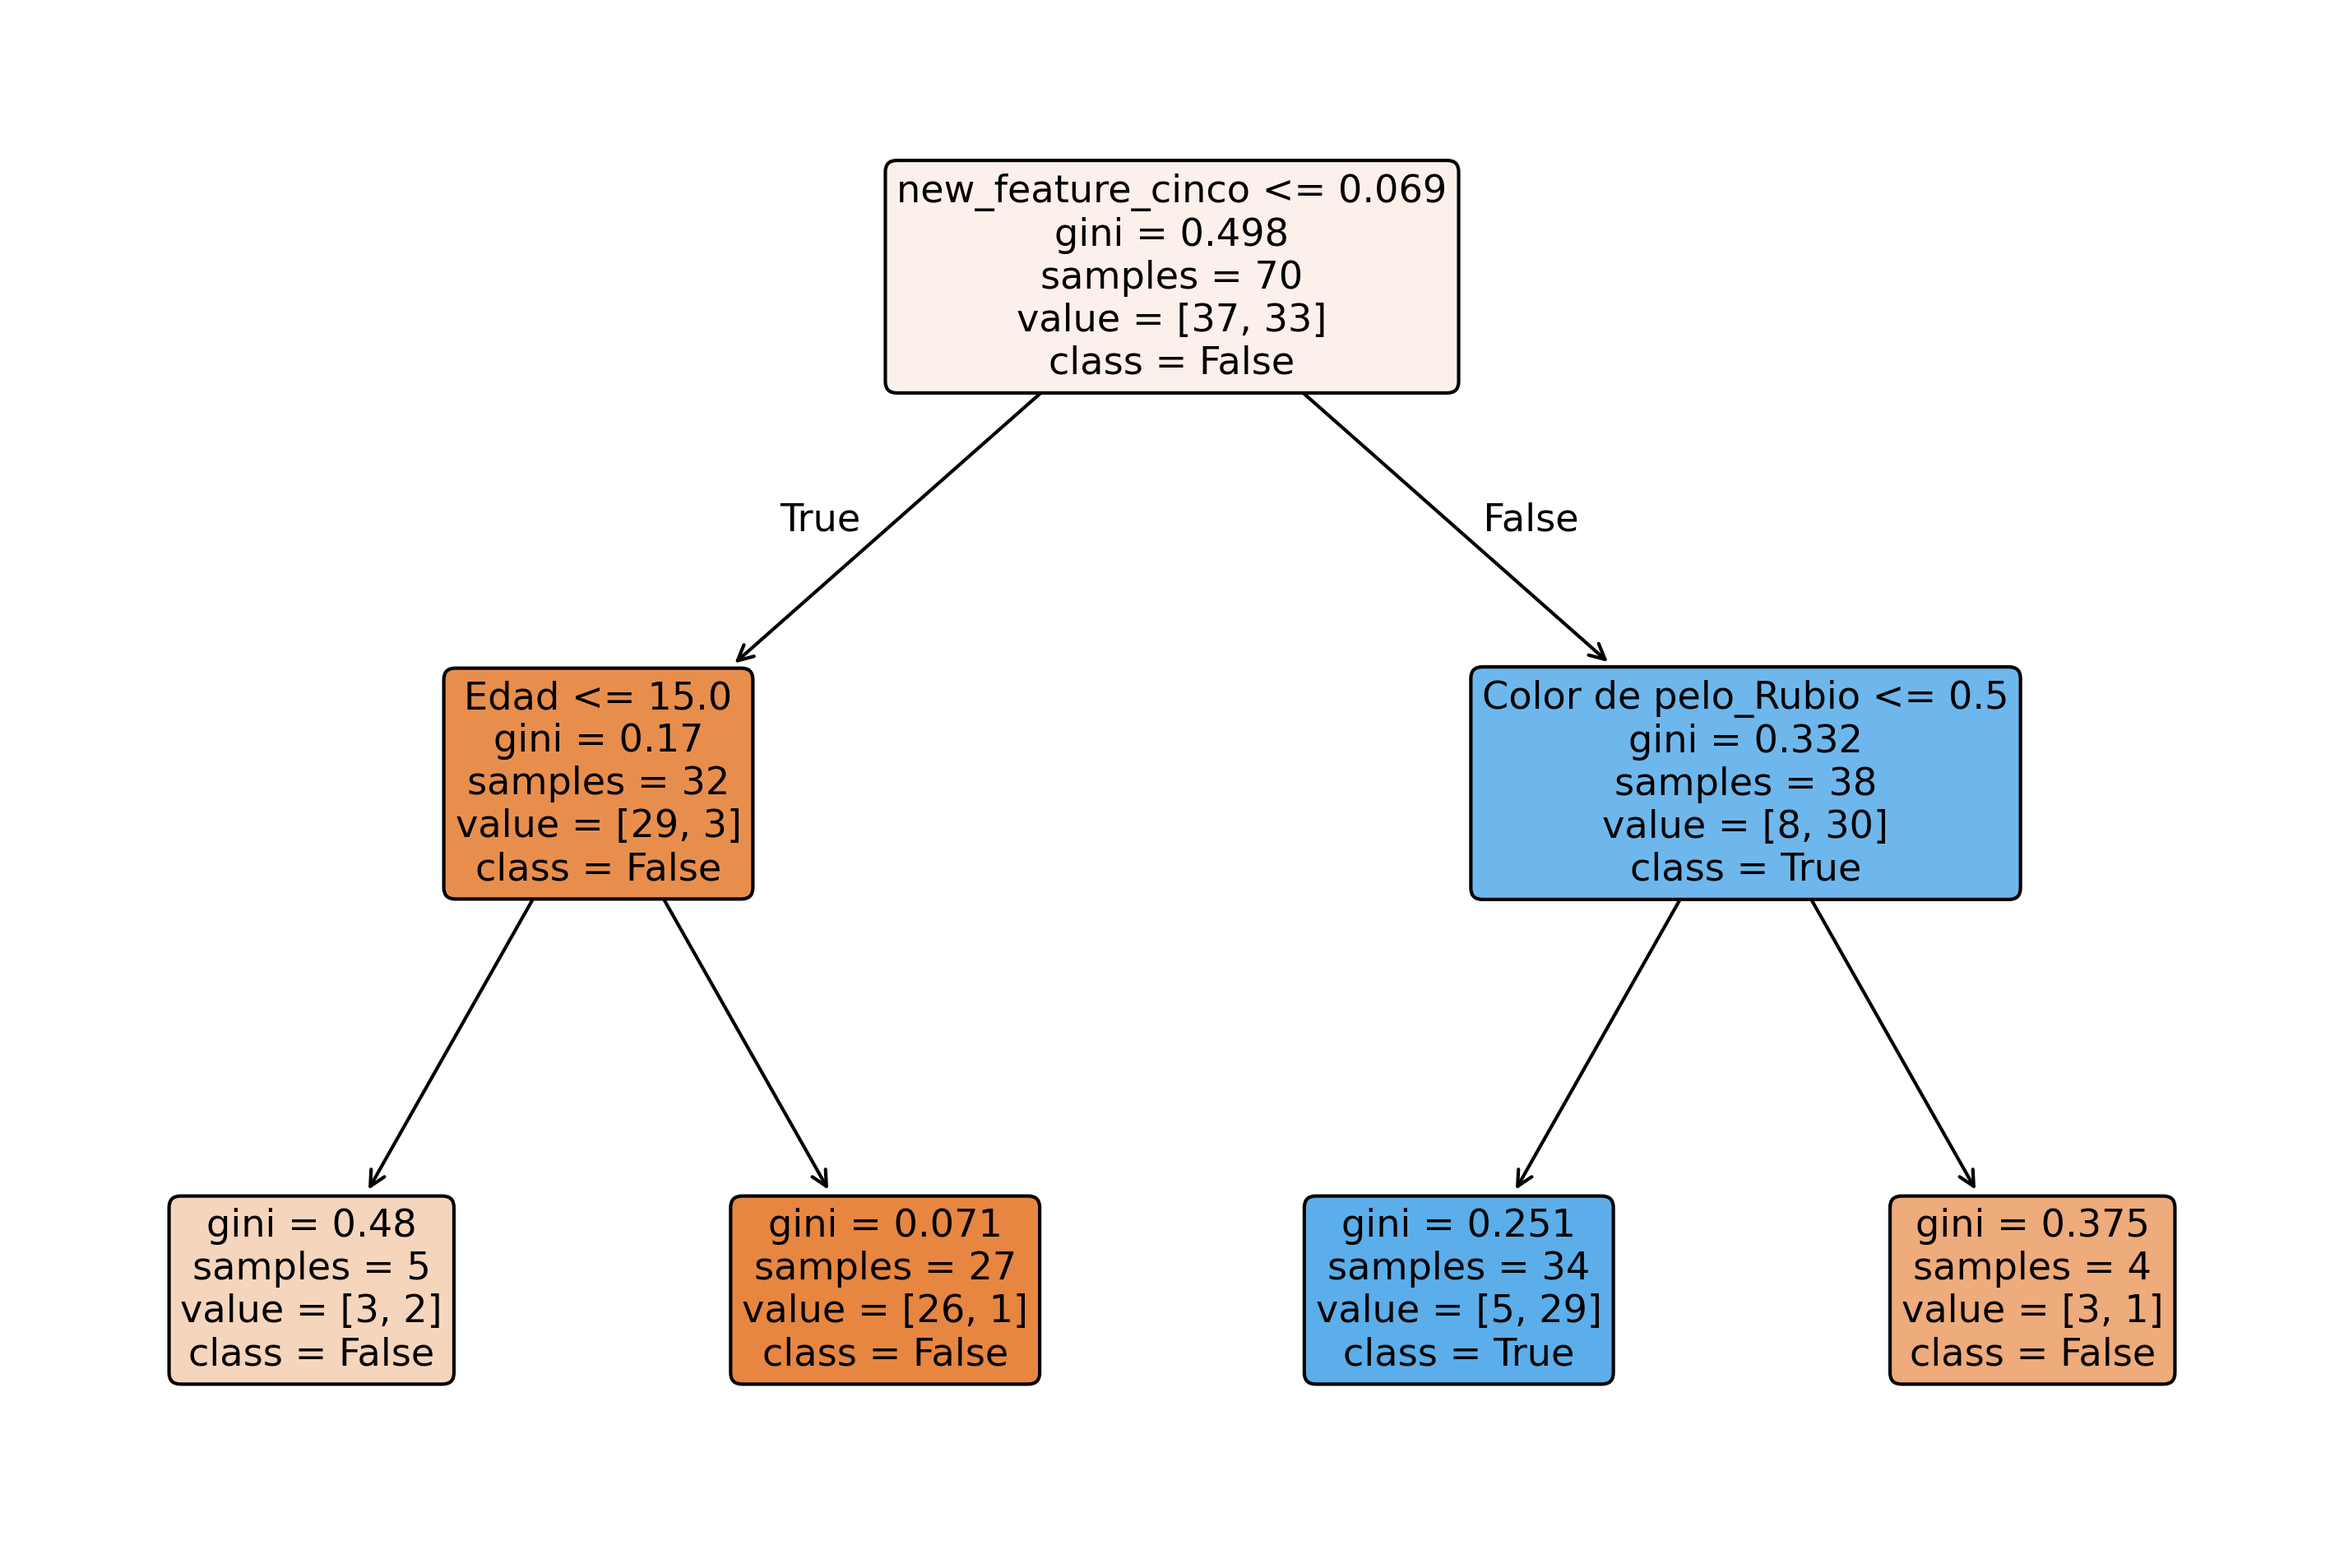

In [86]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8), dpi=300) # Increase figsize and dpi
plot_tree(model_full_features, feature_names=X_train_processed.columns, class_names=['False', 'True'], filled=True, rounded=True)
plt.show()

# ¿El árbol o el bosque?

Hasta ahora entrenamos un solo árbol de decisión. Pero, ¿y si usamos varios?



## Random Forest: muchos árboles que trabajan en paralelo
- Entrena muchos árboles distintos y los hace votar.
- Cada árbol ve una parte diferente de los datos y elige entre distintas preguntas.
- Como no todos cometen los mismos errores, la combinación suele ser más precisa y confiable que un solo árbol.






## HistGradientBoostingClassifier: árboles que aprenden de los errores
- Entrena los árboles uno después del otro.
- Cada nuevo árbol intenta corregir lo que los anteriores hicieron mal.
- Es una forma muy efectiva de mejorar progresivamente el modelo.


### Ejercicio (Opcional)

Entrenar un `RandomForestClassifier` y un `HistGradientBoostingClassifier` usando los datos `X_train_processed`.


In [88]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

# entrenarlo, buscar mejores parametros, reportar metrica obtenida

In [92]:
best_params = {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
model_full_features = DecisionTreeClassifier(random_state=0, **best_params)

model_full_features.fit(X_train_processed, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, random_state=0)

# Hora del Test-set!
Hora de la evaluacion final!

- Instanciar el mejor modelo logrado hasta el momento, con los mejores parametros
- Entrenarlo con todos los datos de entrenamiento
- Predecir sobre el conjunto de test

In [93]:

best_model = DecisionTreeClassifier(random_state=0, **best_params)

best_model.fit(X_train_processed, y_train)
y_pred = best_model.predict(X_test_processed)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.50      0.67        10
        True       0.62      1.00      0.76         8

    accuracy                           0.72        18
   macro avg       0.81      0.75      0.71        18
weighted avg       0.83      0.72      0.71        18



Por ultimo vemos la matriz de confusion:

In [97]:
X_test_processed.columns

Index(['Edad', 'Tiene barba', 'Tiene bigote', 'Usa collar', 'Usa lentes',
       'Usa caravanas', 'Usa corbata', 'Usa moño', 'Usa chupete', 'Es fumador',
       'Primer episodio', 'Apariciones', 'Apariciones en especiales',
       'apellido_simpson', 'new_feature_uno', 'new_feature_dos',
       'new_feature_tres', 'new_feature_cuatro', 'new_feature_cinco',
       'Sexo_Femenino', 'Sexo_Masculino', 'Grupo Etario_Adulto',
       'Grupo Etario_Adulto mayor', 'Grupo Etario_Joven', 'Pelo_Calvo',
       'Pelo_Corto', 'Pelo_Largo', 'Color de piel_Amarillo',
       'Color de piel_Blanco', 'Color de piel_Latina', 'Color de piel_Marrón',
       'Color de piel_Marrón claro', 'Color de pelo_Amarillo',
       'Color de pelo_Azul', 'Color de pelo_Blanco', 'Color de pelo_Castaño',
       'Color de pelo_Gris', 'Color de pelo_Marrón', 'Color de pelo_Naranja',
       'Color de pelo_Negro', 'Color de pelo_Rubio', 'Color de pelo_Verde'],
      dtype='object')

In [100]:
idx = np.argsort(best_model.feature_importances_)[::-1]
X_test_processed.columns[idx]

for c, i in zip(X_test_processed.columns[idx], best_model.feature_importances_[idx]):
  print(c, i)

new_feature_cinco 0.8191099301302563
Color de pelo_Rubio 0.12674717244523534
Edad 0.054142897424508216
Color de pelo_Naranja 0.0
Color de pelo_Negro 0.0
Color de pelo_Gris 0.0
Color de pelo_Castaño 0.0
Color de pelo_Blanco 0.0
Color de pelo_Marrón 0.0
Color de pelo_Verde 0.0
Color de pelo_Amarillo 0.0
Color de pelo_Azul 0.0
Color de piel_Latina 0.0
Color de piel_Marrón claro 0.0
Color de piel_Amarillo 0.0
Pelo_Largo 0.0
Pelo_Corto 0.0
Color de piel_Marrón 0.0
Pelo_Calvo 0.0
Grupo Etario_Joven 0.0
Grupo Etario_Adulto 0.0
Grupo Etario_Adulto mayor 0.0
Sexo_Masculino 0.0
Sexo_Femenino 0.0
new_feature_cuatro 0.0
Color de piel_Blanco 0.0
new_feature_tres 0.0
new_feature_dos 0.0
apellido_simpson 0.0
new_feature_uno 0.0
Apariciones 0.0
Primer episodio 0.0
Es fumador 0.0
Apariciones en especiales 0.0
Usa chupete 0.0
Usa moño 0.0
Usa caravanas 0.0
Usa corbata 0.0
Usa lentes 0.0
Usa collar 0.0
Tiene bigote 0.0
Tiene barba 0.0


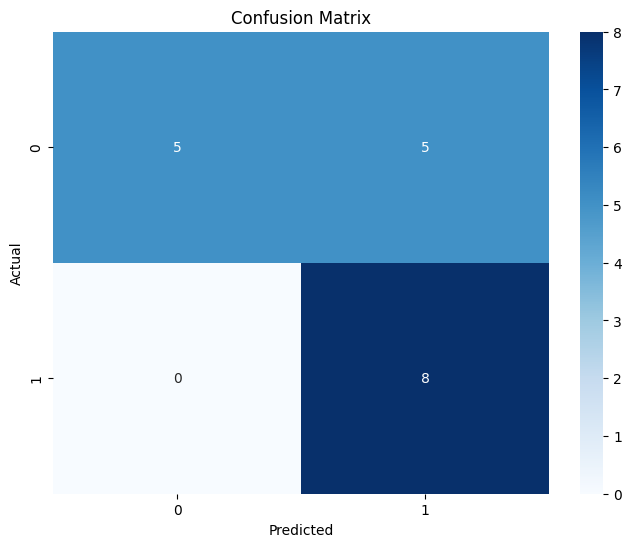

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()